In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

Iteration:  0 Error:  0.3772501713371969 Model:  [ 1.06753477 -0.30734967 -0.37088786]
Iteration:  10 Error:  0.030412407242094597 Model:  [ 1.03896336  0.00270061 -0.18521813]
Iteration:  20 Error:  0.01726042749010577 Model:  [ 1.02072646  0.00259563 -0.10102758]
Iteration:  30 Error:  0.012575786224548942 Model:  [ 1.00984234  0.00259458 -0.05078096]
Iteration:  40 Error:  0.010907145234808876 Model:  [ 1.00334648  0.00259457 -0.02079279]
Iteration:  50 Error:  0.01031278517130205 Model:  [ 0.99946962  0.00259457 -0.00289525]
Iteration:  60 Error:  0.010101077488876549 Model:  [0.99715583 0.00259457 0.00778636]
Iteration:  70 Error:  0.01002566839736042 Model:  [0.99577492 0.00259457 0.01416136]
Iteration:  80 Error:  0.009998808129045626 Model:  [0.99495076 0.00259457 0.0179661 ]
Iteration:  90 Error:  0.009989240599331988 Model:  [0.99445888 0.00259457 0.02023685]
Iteration:  100 Error:  0.009985832743154767 Model:  [0.99416532 0.00259457 0.02159208]
Iteration:  110 Error:  0.0099

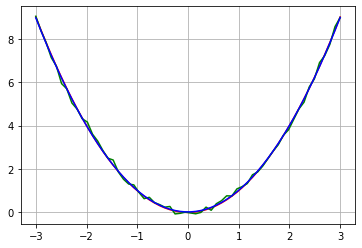

In [14]:
#Zadanie 1

model_evaluator = lambda model, X: X @ model
mse = lambda a, b: np.mean((a-b)**2)
def jacobian_calculator(model, X, y):
    temp = model_evaluator(model, X) - y
    result = np.mean(X.T * temp, axis=1)
    return result

def steepest_descent(X,  y ,  model ,  model_evaluator , jacobian_calculator ,  max_iters):
    i = 0
    f = lambda x: mse(model_evaluator(model - x*jacobian_calculator(model, X, y), X), y)
    current_error = mse(model_evaluator(model, X), y)
    prev_error = np.inf
    while (i<max_iters) and prev_error - current_error> 0:
        learning_rate = optimize.golden(f)
        model = model - learning_rate * jacobian_calculator(model, X, y)
        current_values = model_evaluator(model, X)
        prev_error = current_error
        current_error = mse(current_values, y)
        if i % 10 == 0:
            print("Iteration: ", i, "Error: ", current_error, "Model: ", model)
        i +=1
    return model

start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples)
f = x**2
f_noise = f + np.random.normal(0, 0.1, size=x.shape)

X = np.array(
    [x**2, x**1, x**0]
).T
initial_model = np.random.randn(3)
num_iters = 200
learning_rate = 0.1
model = steepest_descent(X, f_noise, initial_model, model_evaluator, jacobian_calculator, num_iters)
new_f = model_evaluator(model, X)
model_direct = np.linalg.inv(X.T @ X) @ X.T @ f_noise
new_f_direct = model_evaluator(model_direct, X)

print("MSE SD: ", mse(new_f, f))
print("MSE Direct: ", mse(new_f_direct, f))

plt.figure()
plt.plot(x, f, "r-")
plt.plot(x, f_noise, "g-")
plt.plot(x, new_f, "b-")
plt.grid(True)
plt.show()

In [20]:
#Zadanie 2
def newton_gauss(X, y, model, model_evaluator, num_iters):
    """
    mean((y' -y)**2) -> min
    mean((model * X - y)**2) -> min
    mean((model * X - y) * X) = 0
    mean(X^2)
    """
    for i in range(num_iters):
        evaluated_model = model_evaluator(model, X)
        r = (evaluated_model - y)**2
        #df = np.mean(X.T * (evaluated_model - y), axis=1)
        #df = np.array([df]).T
        df_n = (X.T * (evaluated_model - y)).T
        ddf_n = np.linalg.pinv(df_n.T @ df_n) @ df_n.T @ r
        print(ddf_n)
        model = model - (1/2)*ddf_n
        current_values = model_evaluator(model, X)
        current_error = mse(current_values, y)
        print("Iteration: ", i, "Error: ", current_error, "Model: ", model)
    return model

start = -3
stop = 3
step = 0.1
samples = int((stop - start) / step)

x = np.linspace(start, stop, samples)
f = x**2
f_noise = f + np.random.normal(0, 1, size=x.shape)

X = np.array(
    [x**2, x**1, x**0]
).T

model_evaluator = lambda model, X: X @ model

initial_model = np.random.randn(3)
num_iters = 20
model = newton_gauss(X, f_noise, initial_model, model_evaluator, num_iters)
new_f = model_evaluator(model, X)
print(X.shape, f_noise.shape)
model_direct = np.linalg.inv(X.T @ X) @ X.T @ f_noise
new_f_direct = model_evaluator(model_direct, X)

print("MSE GD: ", mse(new_f, f))
print("MSE Direct: ", mse(new_f_direct, f))

[-0.76233985 -0.78157488  0.37717777]
Iteration:  0 Error:  2.7550675155400937 Model:  [ 0.75672585 -0.46660683  0.10669194]
[-0.4512097  -0.35750199  0.41036431]
Iteration:  1 Error:  1.1427332808492114 Model:  [ 0.98233071 -0.28785583 -0.09849021]
[-0.19837859 -0.38304049  0.30771415]
Iteration:  2 Error:  0.7983345783378378 Model:  [ 1.08152    -0.09633559 -0.25234729]
[-0.06026218 -0.10184504  0.01638353]
Iteration:  3 Error:  0.7826665157658821 Model:  [ 1.11165109 -0.04541307 -0.26053905]
[ 0.02448309  0.04021646 -0.00198068]
Iteration:  4 Error:  0.7833408805934486 Model:  [ 1.09940955 -0.0655213  -0.25954871]
[-0.0124105  -0.02045808  0.00129993]
Iteration:  5 Error:  0.7820332713213871 Model:  [ 1.1056148  -0.05529226 -0.26019868]
[ 0.00608231  0.00999036 -0.00049721]
Iteration:  6 Error:  0.7824224565327386 Model:  [ 1.10257364 -0.06028744 -0.25995007]
[-0.00306089 -0.00503425  0.00027623]
Iteration:  7 Error:  0.7821664420431367 Model:  [ 1.10410409 -0.05777032 -0.26008819]


In [25]:
#zadanie 3
def jacobian(f, X, step):
    #f - callable gdzie X dziedziną
    #X - meshgrid będący dziedziną funkcji
    f_called = f(X)
    if np.array(f_called).ndim == X[0].ndim: #przypadek gdy f: R^n -> R
        f_called = [f_called]
    result = []
    for i, func in enumerate(f_called):
        result.append(np.gradient(func, step))
    return result
start = 0
stop = 10
step = 0.1
samples_new = int((stop - start) / step)
x_new = np.linspace(start, stop, samples_new)
y_new = np.linspace(start, stop, samples_new)
X = np.meshgrid(x_new, y_new)
f = lambda X: [2*X[0] + 3*X[1], 4*X[0]]
f2 = lambda X: X[0]
print(jacobian(f, X, step))


[[array([[3.03030303, 3.03030303, 3.03030303, ..., 3.03030303, 3.03030303,
        3.03030303],
       [3.03030303, 3.03030303, 3.03030303, ..., 3.03030303, 3.03030303,
        3.03030303],
       [3.03030303, 3.03030303, 3.03030303, ..., 3.03030303, 3.03030303,
        3.03030303],
       ...,
       [3.03030303, 3.03030303, 3.03030303, ..., 3.03030303, 3.03030303,
        3.03030303],
       [3.03030303, 3.03030303, 3.03030303, ..., 3.03030303, 3.03030303,
        3.03030303],
       [3.03030303, 3.03030303, 3.03030303, ..., 3.03030303, 3.03030303,
        3.03030303]]), array([[2.02020202, 2.02020202, 2.02020202, ..., 2.02020202, 2.02020202,
        2.02020202],
       [2.02020202, 2.02020202, 2.02020202, ..., 2.02020202, 2.02020202,
        2.02020202],
       [2.02020202, 2.02020202, 2.02020202, ..., 2.02020202, 2.02020202,
        2.02020202],
       ...,
       [2.02020202, 2.02020202, 2.02020202, ..., 2.02020202, 2.02020202,
        2.02020202],
       [2.02020202, 2.02020202, 